In [1]:
# import package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA


# import my own function
import BlackLitterman as BL
import PortfolioFunction as pf

In [2]:
raw_data = pd.read_csv("Return.csv",index_col = 'Dates',parse_dates = True)

# Calculate the log return
data = np.log(raw_data) - np.log(raw_data.shift(1))
data = data.dropna()

In [3]:
weight = pd.read_csv("asset_weight.csv",index_col='asset').dropna()

In [4]:
data.head()

,XBTUSD Curncy,CL1 Comdty,GC1 Comdty,C 1 Comdty,HG1 Comdty,SI1 Comdty,SP1 Index,NQ1 Index,TY1 Comdty,SPY US Equity,PCY US Equity,VWO US Equity,VYM US Equity,VNQ US Equity,IWM US Equity,XOP US Equity
Dates,,,,,,,,,,,,,,,,
2010-08-31,0.000000,-0.093260,0.054829,0.077739,0.016197,0.075521,-0.046594,-0.052785,0.021474,-0.046024,0.022678,-0.025887,-0.033911,-0.012840,-0.077355,-0.052098
2010-09-30,0.000000,0.106097,0.046564,0.155160,0.081392,0.116648,0.080960,0.121894,-0.003588,0.080430,0.008284,0.108151,0.064402,0.034776,0.114788,0.092663
2010-10-31,1.152680,0.018092,0.037004,0.160399,0.023314,0.119301,0.037131,0.061464,0.001858,0.037490,0.014599,0.030545,0.032326,0.046337,0.040644,0.036934
2010-11-30,0.100083,0.032382,0.020350,-0.093593,0.024091,0.137671,-0.000085,-0.002359,-0.009823,0.000021,-0.051498,-0.028787,-0.005482,-0.018689,0.034257,0.095414
2010-12-31,0.356675,0.082901,0.025731,0.171254,0.149506,0.092290,0.060365,0.045704,-0.037558,0.059446,-0.007471,0.055647,0.053515,0.033609,0.072752,0.089375


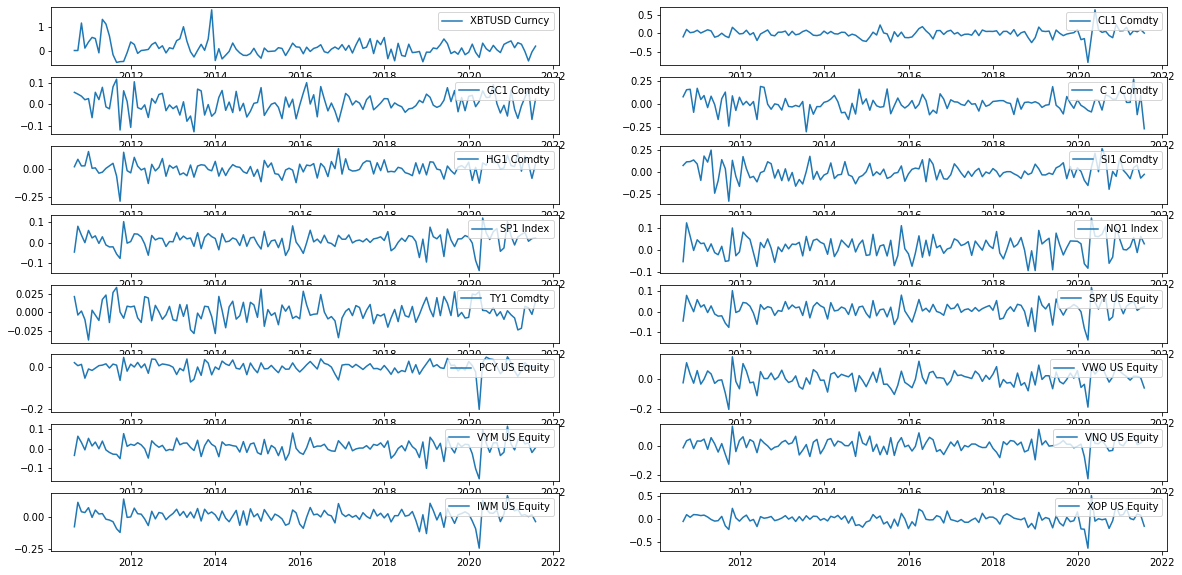

In [5]:
i=0
f, axs = plt.subplots(8,2,figsize=(20,10))
for row in axs:
    for col in row:
        col.plot(data.iloc[:,i], label = data.columns[i])
        col.legend(loc="upper right")
        i += 1

In [6]:
data.describe()

,XBTUSD Curncy,CL1 Comdty,GC1 Comdty,C 1 Comdty,HG1 Comdty,SI1 Comdty,SP1 Index,NQ1 Index,TY1 Comdty,SPY US Equity,PCY US Equity,VWO US Equity,VYM US Equity,VNQ US Equity,IWM US Equity,XOP US Equity
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.101877,-0.000496,0.003241,0.002510,0.002301,0.002652,0.010496,0.015783,0.000625,0.010458,0.000166,0.001511,0.007767,0.005571,0.009270,-0.005100
std,0.335540,0.124894,0.046441,0.089394,0.062604,0.093219,0.039372,0.045083,0.013696,0.039046,0.029514,0.052810,0.036571,0.046446,0.054758,0.119852
min,-0.498556,-0.781866,-0.129212,-0.308383,-0.286171,-0.327914,-0.138389,-0.092988,-0.037558,-0.139247,-0.200214,-0.203812,-0.153646,-0.223344,-0.245639,-0.625890
25%,-0.088212,-0.057495,-0.024700,-0.039924,-0.032738,-0.053909,-0.006779,-0.012640,-0.007656,-0.007034,-0.011393,-0.028243,-0.010504,-0.016862,-0.016762,-0.053963
50%,0.064563,0.009999,0.003500,0.002244,0.004177,-0.005110,0.016410,0.019316,-0.001223,0.014428,0.002467,0.002815,0.011986,0.009996,0.016375,-0.001585
75%,0.254989,0.060140,0.032147,0.048056,0.039618,0.051178,0.032469,0.044283,0.008715,0.032301,0.016258,0.034291,0.029700,0.033802,0.040050,0.058709
max,1.706623,0.633269,0.115959,0.271153,0.175062,0.265913,0.121749,0.143587,0.033976,0.119545,0.050565,0.147631,0.115629,0.133581,0.167582,0.502156


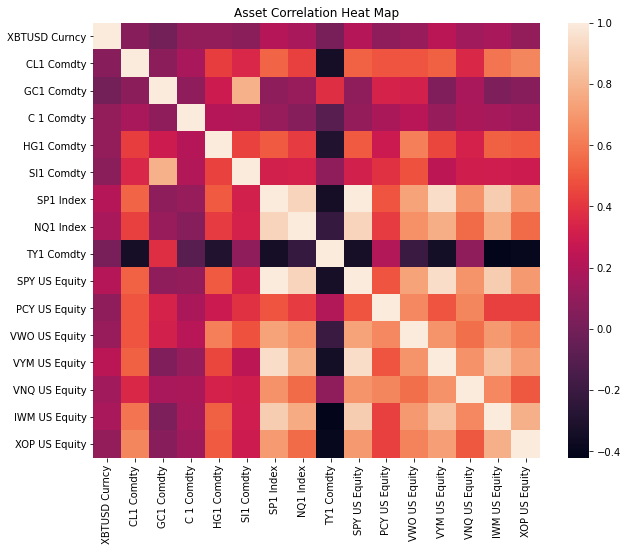

In [7]:
corrR = data.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrR,xticklabels = corrR.columns, yticklabels = corrR.columns)
ax = plt.gca()
ax.set_title("Asset Correlation Heat Map")
plt.savefig("Corr.png")

Text(0.5, 1.0, 'Asset Covariance Heat Map')

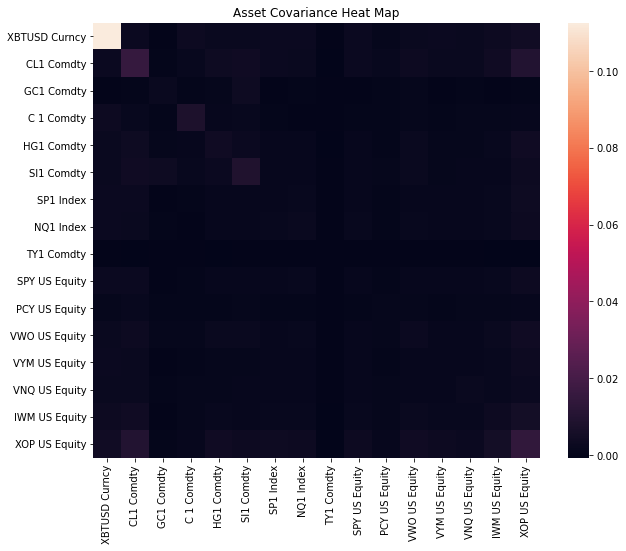

In [8]:
sigmaR = data.cov()
fig = plt.figure(figsize=(10,8))
sns.heatmap(sigmaR,xticklabels = sigmaR.columns, yticklabels = sigmaR.columns)
ax = plt.gca()
ax.set_title("Asset Covariance Heat Map")

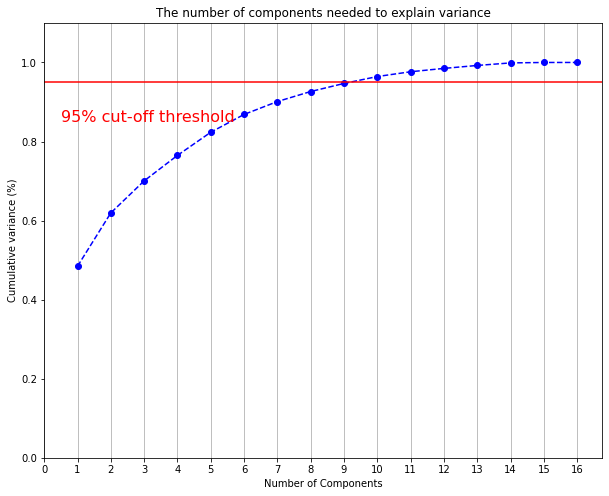

In [9]:
### Conduct Principle Component Analysis ###

# Standardize data and figure out how many components
scaled_data = StandardScaler().fit_transform(data)
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (10,8)

fig, ax = plt.subplots()
xi = np.arange(1, 17, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 17, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

#print("PCA explained variance ratio:" , pca.explained_variance_ratio_)
#print("PCA singular values:" , pca.singular_values_)
ax.grid(axis='x')
#plt.show()
#plt.savefig("PCA.png")

In [10]:
'''
pca = PCA(n_components = 0.95)
pca.fit(scaled_data)
reduced = pca.transform(scaled_data)
pd.DataFrame(reduced)
'''

'\npca = PCA(n_components = 0.95)\npca.fit(scaled_data)\nreduced = pca.transform(scaled_data)\npd.DataFrame(reduced)\n'

From the plot above, we could easily find out that we need at least 8 principal components to gain 90% to 95% variance.
Therefore, I will reduce the variance from 14 to 9.

In [11]:
# pca
pca = PCA(n_components = 9)
principalComponents = pca.fit_transform(scaled_data)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
#principalDf

In [12]:
# PCA rolling window
for i,j in zip(range(0,len(data)+12,12),range(12,len(data)+12,12)):
    pca = PCA(n_components = 0.95)
    reduced = pca.fit_transform(scaled_data[i:j])
    print(pd.DataFrame(reduced))

           0         1         2         3         4         5
0  -3.291290 -1.506131  1.947924 -0.908989  1.043034  0.001529
1   4.532145 -0.594880 -0.278120 -1.619613 -1.090220  0.695498
2   1.878523  2.068322  0.950896  0.305281  0.442454  0.051928
3  -0.711805 -1.950086 -1.248691  1.552052 -0.519205 -1.086721
4   3.695608 -0.394032 -1.989057 -0.477065  1.765227 -0.182377
5  -0.851799  1.418639 -1.539230 -0.808363 -0.806670 -1.169811
6   1.696286 -0.111125  0.640682  0.767418 -0.044881 -0.588742
7  -0.496182 -2.130347 -0.618538  0.708525 -0.610689  1.211632
8   1.383383  1.857747  2.712224  1.849707 -0.120623  0.279816
9  -3.309200  3.167870 -0.427990 -1.060865 -0.217181  0.279566
10 -3.136575  0.207031 -2.441046  0.854543  0.340872  0.856928
11 -1.389096 -2.033008  2.290947 -1.162632 -0.182118 -0.349246
           0         1         2         3
0   2.700791  4.800164  0.148324 -1.120826
1   9.339922 -1.976968 -1.183409 -1.048160
2  -7.900177 -0.945136 -1.199581 -0.926328
3   0.838

In [13]:
# Store the data
correlation_matrix = corrR.values
cov_matrix = sigmaR.values
log_expected_return = data.mean().values
r = 0.0223

In [14]:
# Tangency Portfolio weight
W_T = pf.Tangency_Portfolio(log_expected_return,r,cov_matrix)
Portfolio = pd.DataFrame(data = W_T * 100)
Portfolio.columns = ['Tangency Portfolio']
Portfolio.index = data.columns

In [15]:
# Minimum Variance Portfolio with cash position
portfolio_expected_ret = np.array([0.005, 0.05, 0.1, 0.3])
portfolio_expected_ret = np.reshape(portfolio_expected_ret, (4,1))
w_min_cash, w_min = pf.Min_Var_portfolio(log_expected_return,r,cov_matrix, portfolio_expected_ret)
w_min_cash = w_min_cash * 100  #percentage
w_min = np.transpose(w_min*100)
Portfolio['MVP with mu = 0.5%'] = w_min[:,0]
Portfolio['MVP with mu = 5%'] = w_min[:,1]
Portfolio['MVP with mu = 10%'] = w_min[:,2]
Portfolio['MVP with mu = 30%'] = w_min[:,3]

In [16]:
# Maximum Return Portfolio with cash
portfolio_expected_vol = np.array([0.005, 0.05, 0.1, 0.3])
portfolio_expected_vol = np.reshape(portfolio_expected_vol,(4,1))
w_max_cash, w_max = pf.Maximum_Return_Portfolio(log_expected_return, r, cov_matrix, portfolio_expected_vol)
w_max_cash = w_max_cash * 100
w_max = np.transpose(w_max * 100)
Portfolio['MRP with sigma = 0.5%'] = w_max[:,0]
Portfolio['MRP with sigma = 5%'] = w_max[:,1]
Portfolio['MRP with sigma = 10%'] = w_max[:,2]
Portfolio['MRP with sigma = 30%'] = w_max[:,3]

In [17]:
# Calculate Return and Standard Deviation
tangency_return = pf.Portfolio_returns(log_expected_return,r,W_T*100)
tangency_sigma = pf.Portfolio_std(cov_matrix,W_T*100)
min_return = np.zeros((4,1))
min_std = np.zeros((4,1))
max_return = np.zeros((4,1))
max_std = np.zeros((4,1))
for i in range(0,4):
    min_return[i] = pf.Portfolio_returns(log_expected_return,r,w_min[:,i])
    min_std[i] = pf.Portfolio_std(cov_matrix,w_min[:,i])
    max_return[i] = pf.Portfolio_returns(log_expected_return,r,w_max[:,i])
    max_std[i] = pf.Portfolio_std(cov_matrix,w_max[:,i])

In [18]:
equal_weight_return = np.dot(log_expected_return,(1/len(data.columns))).sum() * 100

In [19]:
## Blakc_Litterman Portfolio Optimization

In [20]:
### Instantiation ###
tau = 0.05
# calculate risk_aversion parameter (lambda)
excess_return = data.subtract(r)
cov_excess_return = excess_return.cov()/len(excess_return)
cov_excess_return = cov_excess_return.values

global_return = excess_return.mean().multiply(weight["weight"].values).sum()
market_var = np.matmul(weight.values.reshape(len(weight)).T,
                                       np.matmul(cov_excess_return, weight.values.reshape(len(weight))))
risk_aversion = global_return/ market_var
print(f'The global market mean return is {global_return:.4f} and the variance is {market_var:.6}')
print(f'The risk aversion parameter is {risk_aversion:.2f}')

The global market mean return is 0.0544 and the variance is 0.00046456
The risk aversion parameter is 117.01


In [21]:
W_mkt = np.array(weight).T
Q = np.array([[0.265],[0.022],[0.037],[0.209],[-0.112]]) # CL1, C 1, GC1, HG1, SI1
P = np.array([[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]\
            ,[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]])

omega = np.zeros((5,5))
omega[0,0] = P[0,:] @ cov_excess_return @ P[0,:].T
omega[1,1] = P[1,:] @ cov_excess_return @ P[1,:].T
omega[2,2] = P[2,:] @ cov_excess_return @ P[2,:].T
omega[3,3] = P[3,:] @ cov_excess_return @ P[3,:].T
omega[4,4] = P[4,:] @ cov_excess_return @ P[4,:].T

In [22]:
expected_return, BL_return, updated_sigmaR, updated_weight = BL.BlackLitterman(W_mkt,risk_aversion\
                                                                    ,tau, cov_excess_return, P, Q, omega)

In [23]:
updated_sigmaR = pd.DataFrame(data = updated_sigmaR)
updated_weight = updated_weight*100

<Figure size 720x576 with 0 Axes>

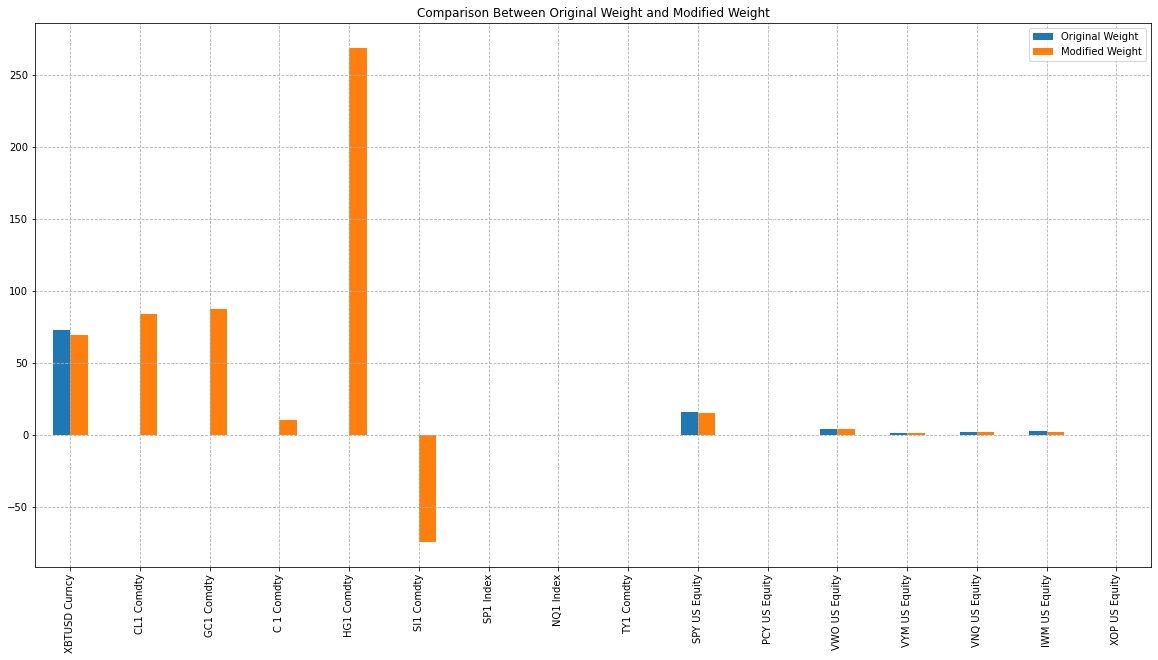

In [24]:
W_mkt = W_mkt*100
Weight_comparison_data = pd.DataFrame(data = W_mkt.T,index = data.columns, columns = ["Original Weight"])
Weight_comparison_data['Modified Weight'] = updated_weight
fig = plt.figure()
Weight_comparison_data.plot(figsize = (20,10),kind = 'bar')
ax = plt.gca()
ax.set_title('Comparison Between Original Weight and Modified Weight')
ax.grid(True,linestyle = '--')
#plt.savefig("weight.png")

## Indicators

In [25]:
price = pd.read_csv("price.csv",index_col='Dates',parse_dates = True).dropna()

In [26]:
def get_adx(high, low, close, lookback):
    plus_dm = high.diff()
    minus_dm = low.diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0
    
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift(1)))
    tr3 = pd.DataFrame(abs(low - close.shift(1)))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.rolling(lookback).mean()
    
    plus_di = 100 * (plus_dm.ewm(alpha = 1/lookback).mean() / atr)
    minus_di = abs(100 * (minus_dm.ewm(alpha = 1/lookback).mean() / atr))
    dx = (abs(plus_di - minus_di) / abs(plus_di + minus_di)) * 100
    adx = ((dx.shift(1) * (lookback - 1)) + dx) / lookback
    adx_smooth = adx.ewm(alpha = 1/lookback).mean()
    return adx_smooth

In [27]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

In [28]:
ticker = ["XBTUSD","CL1","GC1","C 1","HG1","SI1","SP1","NQ1","TY1","SPY","PCY","VWO","VYM","VNQ","IWM","XOP"]
indicator = pd.DataFrame()

for tk in ticker:
    high_low = price[tk + '_High'] - price[tk + '_Low']
    high_close = np.abs(price[tk + '_High'] - price[tk + '_Last'].shift())
    low_close = np.abs(price[tk + '_Low'] - price[tk + '_Last'].shift())
    
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)

    atr = true_range.rolling(5).sum()/5
    atr = atr.dropna()
    
    indicator[tk+"_ATR"] = atr
    
    ## ADX
    _adx =get_adx(price[tk + "_High"],price[tk + "_Low"],price[tk + "_Last"],5)
    indicator[tk + "_ADX"] = _adx
    
    ## EWA    
    _ewa = price[tk + "_Last"].ewm(span=5).mean()
    indicator[tk + "_EWA"] = _ewa
    
    #RSI
    _rsi = get_rsi(price[tk + "_Last"],5)
    indicator[tk + "_RSI"] = _rsi
    
indicator = indicator.fillna(indicator.mean()) # fill nan with means
#indicator

In [29]:
xbtusd = indicator.iloc[:,:4].merge(data.iloc[:,0],left_index=True, right_index=True)
cl1 = indicator.iloc[:,4:8].merge(data.iloc[:,1],left_index=True, right_index=True)
gc1 = indicator.iloc[:,8:12].merge(data.iloc[:,2],left_index=True, right_index=True)
c_1 = indicator.iloc[:,12:16].merge(data.iloc[:,3],left_index=True, right_index=True)
hg1 = indicator.iloc[:,16:20].merge(data.iloc[:,4],left_index=True, right_index=True)
si1 = indicator.iloc[:,20:24].merge(data.iloc[:,5],left_index=True, right_index=True)
sp1 = indicator.iloc[:,24:28].merge(data.iloc[:,6],left_index=True, right_index=True)
nq1 = indicator.iloc[:,28:32].merge(data.iloc[:,7],left_index=True, right_index=True)
ty1 = indicator.iloc[:,32:36].merge(data.iloc[:,8],left_index=True, right_index=True)
spy = indicator.iloc[:,36:40].merge(data.iloc[:,9],left_index=True, right_index=True)
pcy = indicator.iloc[:,40:44].merge(data.iloc[:,10],left_index=True, right_index=True)
vwo = indicator.iloc[:,44:48].merge(data.iloc[:,11],left_index=True, right_index=True)
vym = indicator.iloc[:,48:52].merge(data.iloc[:,12],left_index=True, right_index=True)
vnq = indicator.iloc[:,52:56].merge(data.iloc[:,13],left_index=True, right_index=True)
iwm = indicator.iloc[:,56:60].merge(data.iloc[:,14],left_index=True, right_index=True)
xop = indicator.iloc[:,60:64].merge(data.iloc[:,15],left_index=True, right_index=True)

In [30]:
np_xbtusd = xbtusd.values
np_cl1 = cl1.values
np_gc1 = gc1.values
np_c_1 = c_1.values
np_hg1 = hg1.values
np_si1 = si1.values
np_sp1 = sp1.values
np_nq1 = nq1.values
np_ty1 = ty1.values
np_spy = spy.values
np_pcy = pcy.values
np_vwo = vwo.values
np_vym = vym.values
np_vnq = vnq.values
np_iwm = iwm.values
np_xop = xop.values
np_combine = np.concatenate([np_xbtusd,np_cl1,np_gc1,np_c_1,np_hg1,np_si1,np_sp1,np_nq1,\
                             np_ty1,np_spy,np_pcy,np_vwo,np_vym,np_vnq,np_iwm,np_xop],axis=0)
df_combine = pd.DataFrame(np_combine,columns = ["atr","adx","ewa","rsi","return"])
#df_combine

In [31]:
# Train SVR model
regr = make_pipeline(StandardScaler(),SVR(C = 1.0, epsilon=0.2))
# Fit SVR model with every historical trading signal
regr.fit(df_combine.iloc[:,:-1],df_combine.iloc[:,-1])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

CL1_ATR
predicted=8.747823, expected=13.312000
predicted=15.575649, expected=26.268000
predicted=38.312930, expected=28.378000


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=23.180573, expected=26.914000
predicted=31.134993, expected=25.556000
predicted=20.579542, expected=20.518000
predicted=12.900752, expected=8.088000
predicted=1.714688, expected=5.900000
predicted=8.628335, expected=6.952000
predicted=7.326084, expected=7.252000
predicted=11.758011, expected=7.762000
predicted=16.052800, expected=8.736000
predicted=9.795073, expected=9.526000
predicted=9.300790, expected=8.570000
predicted=7.885038, expected=8.690000
predicted=8.809797, expected=8.966000
predicted=8.425855, expected=8.886000


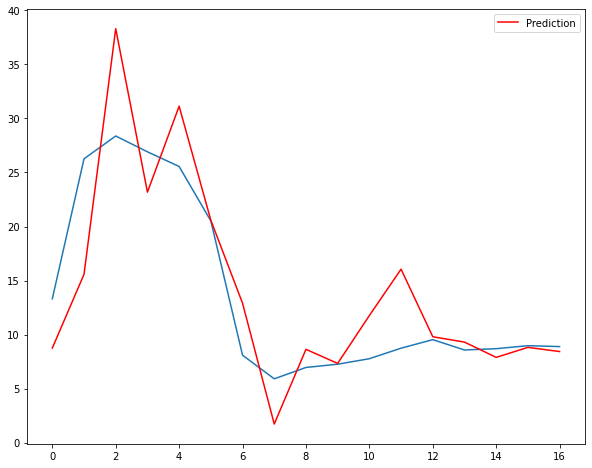

CL1_ADX
predicted=15.482668, expected=19.523359
predicted=21.673902, expected=29.718271
predicted=39.793317, expected=40.668662
predicted=48.784196, expected=46.447942
predicted=48.559929, expected=48.735388
predicted=49.771711, expected=50.050206
predicted=51.662167, expected=50.541831
predicted=50.859254, expected=51.634878
predicted=52.531466, expected=51.967345
predicted=52.115963, expected=48.518841
predicted=44.758069, expected=42.729575
predicted=37.797956, expected=35.849060
predicted=30.824641, expected=34.633533
predicted=35.373178, expected=35.249160
predicted=36.441498, expected=35.979586
predicted=35.547812, expected=38.163553
predicted=40.351017, expected=42.345518


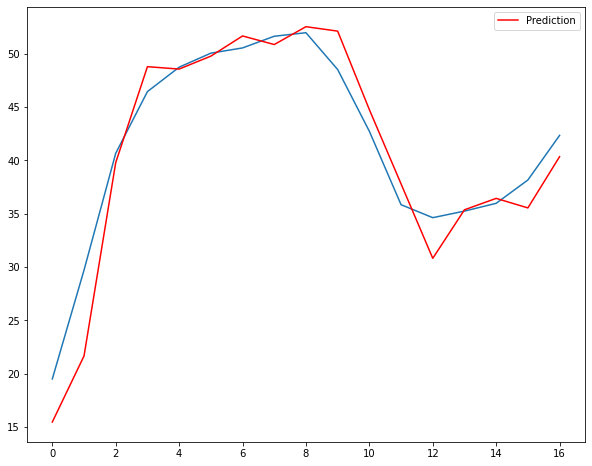

CL1_EWA
predicted=48.387921, expected=41.378986
predicted=32.106561, expected=33.865991
predicted=27.967049, expected=34.407327
predicted=38.083300, expected=36.028218
predicted=38.229916, expected=37.442145
predicted=36.696181, expected=39.164764
predicted=39.533777, expected=39.516509
predicted=39.411638, expected=38.274339
predicted=37.018897, expected=40.629560
predicted=43.039248, expected=43.259706
predicted=45.539276, expected=46.239804
predicted=48.325939, expected=51.326536
predicted=54.923602, expected=53.937691
predicted=55.374796, expected=57.151794
predicted=59.407310, expected=60.207863
predicted=62.340990, expected=64.628575
predicted=68.558181, expected=67.735717


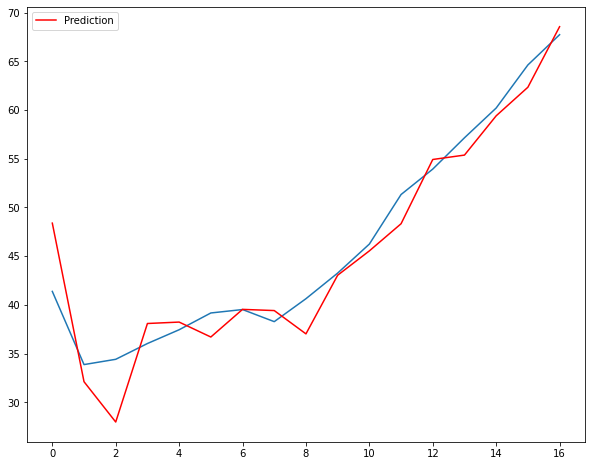

CL1_RSI
predicted=24.790499, expected=12.310987
predicted=12.290975, expected=11.765706
predicted=19.884608, expected=43.515322
predicted=46.762970, expected=48.748825
predicted=51.753435, expected=50.272447
predicted=43.522669, expected=54.250626
predicted=44.150022, expected=49.223164
predicted=49.228681, expected=40.522438
predicted=39.902210, expected=59.712187
predicted=59.187446, expected=64.481971
predicted=66.377567, expected=69.675366
predicted=68.809128, expected=79.256692
predicted=72.607678, expected=72.092563
predicted=70.476210, expected=77.001090
predicted=74.658073, expected=79.759678
predicted=78.055998, expected=85.451614
predicted=87.210077, expected=85.787022


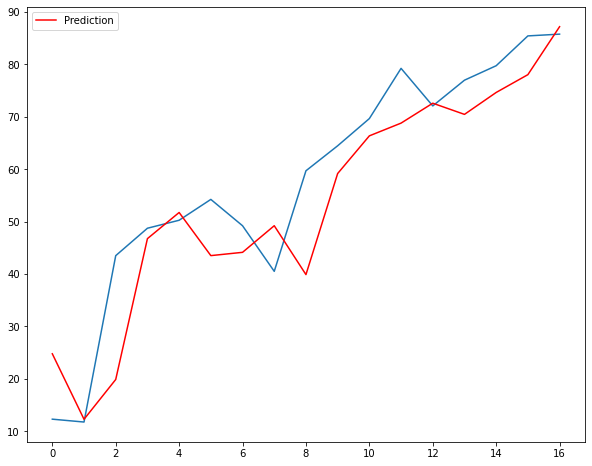

In [32]:
size = int(len(np_cl1)*0.8)
cl1_prediction = pd.DataFrame()
ind = ["_ATR","_ADX","_EWA","_RSI"]
for i in range(4):
    print(cl1.columns[i])
    train, test = np_cl1[:size,i],np_cl1[size:,i]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order = (5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
       
    cl1_prediction["cl1"+ind[i]] = predictions 
    plt.plot(test)
    plt.plot(predictions, color='red',label="Prediction")
    plt.legend()
    plt.show()
    
cl1_prediction["yhat"]= regr.predict(cl1_prediction)
cl1_avg = cl1_prediction[["yhat"]].mean()[0]

C 1_ATR
predicted=29.232681, expected=29.450000
predicted=33.859117, expected=32.150000
predicted=39.315839, expected=31.800000
predicted=38.016178, expected=33.750000
predicted=34.460834, expected=37.200000
predicted=34.581324, expected=35.400000
predicted=34.276344, expected=33.650000
predicted=33.385221, expected=38.800000
predicted=37.962055, expected=40.600000
predicted=39.731305, expected=46.750000
predicted=50.538506, expected=52.450000
predicted=54.384824, expected=55.500000
predicted=54.971068, expected=53.500000
predicted=51.876784, expected=85.300000
predicted=87.631200, expected=98.500000
predicted=100.910523, expected=106.400000
predicted=114.537645, expected=136.350000


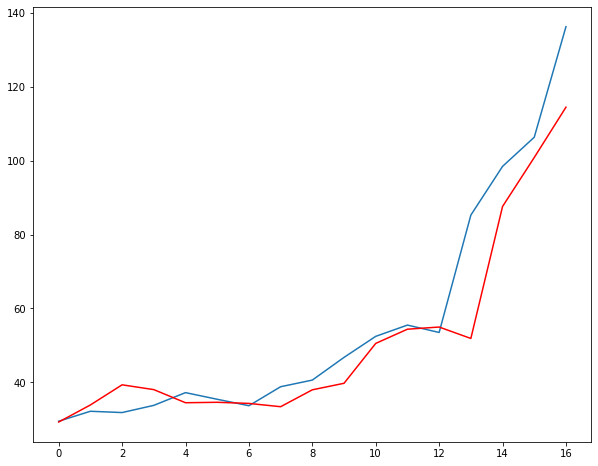

C 1_ADX
predicted=18.058752, expected=20.071790
predicted=24.155606, expected=26.887150
predicted=31.753270, expected=34.919625
predicted=40.051670, expected=40.317111
predicted=40.691974, expected=39.492811
predicted=34.129405, expected=35.099887
predicted=29.024381, expected=32.926370
predicted=30.596463, expected=31.673649
predicted=31.381757, expected=35.645127
predicted=42.433927, expected=40.302506
predicted=42.270320, expected=47.520762
predicted=53.468747, expected=55.007621
predicted=56.082621, expected=61.319217
predicted=62.886964, expected=66.714485
predicted=66.621941, expected=72.414668
predicted=73.244904, expected=76.982918
predicted=77.279885, expected=77.398914


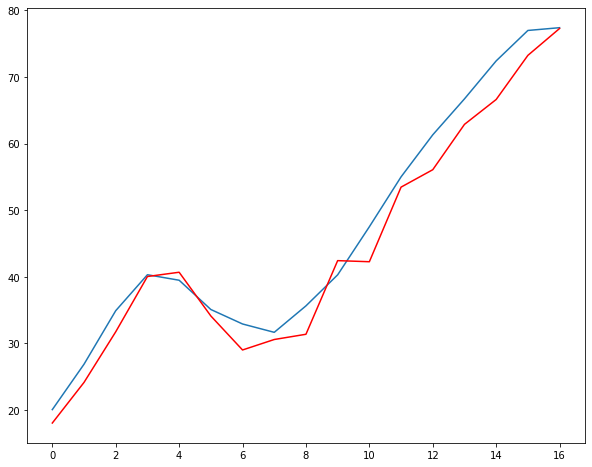

C 1_EWA
predicted=375.328482, expected=365.192368
predicted=365.464151, expected=347.294912
predicted=345.402233, expected=340.113275
predicted=343.457816, expected=339.575517
predicted=344.386087, expected=331.717011
predicted=330.465713, expected=337.311341
predicted=342.901198, expected=351.207560
predicted=357.588780, expected=366.971707
predicted=368.326242, expected=384.564471
predicted=389.380439, expected=417.709648
predicted=430.970447, expected=460.806432
predicted=485.723303, expected=492.370954
predicted=510.542868, expected=516.330636
predicted=534.044136, expected=590.887091


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=652.135288, expected=612.841394
predicted=635.808903, expected=648.560929
predicted=677.569041, expected=614.707286


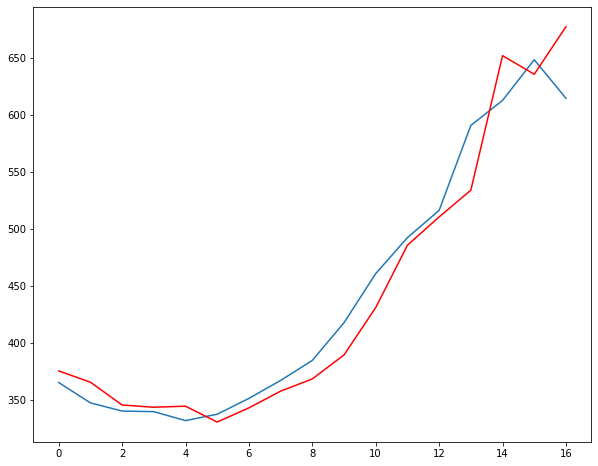

C 1_RSI
predicted=41.760572, expected=28.724326
predicted=36.662215, expected=20.480264
predicted=27.520686, expected=32.310924
predicted=36.884836, expected=41.967262
predicted=41.436748, expected=31.921911
predicted=30.499421, expected=52.465432
predicted=46.583953, expected=64.893033
predicted=55.767259, expected=70.960550
predicted=59.898040, expected=76.494358
predicted=70.890174, expected=86.335607
predicted=78.828992, expected=90.969651
predicted=85.737297, expected=91.458199
predicted=87.949725, expected=92.014134
predicted=90.391065, expected=96.968247
predicted=95.031253, expected=70.918552
predicted=74.199478, expected=76.829908
predicted=79.506936, expected=45.328154


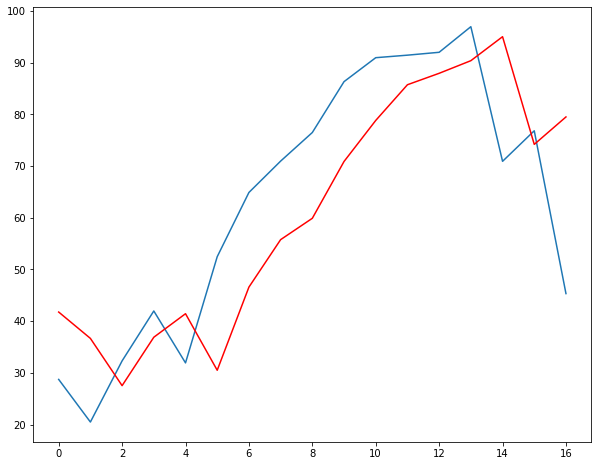

In [33]:
c_1_prediction = pd.DataFrame()
ind = ["_ATR","_ADX","_EWA","_RSI"]
for i in range(4):
    print(c_1.columns[i])
    train, test = np_c_1[:size,i],np_c_1[size:,i]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order = (5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
       
    c_1_prediction["c_1"+ind[i]] = predictions 
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    
c_1_prediction["yhat"]= regr.predict(c_1_prediction)
c_1_avg = c_1_prediction[["yhat"]].mean()[0]

GC1_ATR
predicted=84.723094, expected=124.980000
predicted=135.821144, expected=151.100000
predicted=153.721352, expected=157.860000
predicted=159.594702, expected=163.920000
predicted=158.011988, expected=179.100000
predicted=167.988602, expected=170.480000
predicted=156.279451, expected=159.700000
predicted=154.975472, expected=154.640000
predicted=152.221155, expected=170.580000
predicted=168.934330, expected=154.180000
predicted=151.283075, expected=144.460000
predicted=147.315728, expected=145.600000
predicted=151.183747, expected=147.520000
predicted=139.090526, expected=125.160000
predicted=124.926344, expected=128.140000
predicted=135.607850, expected=128.860000
predicted=128.463172, expected=111.640000


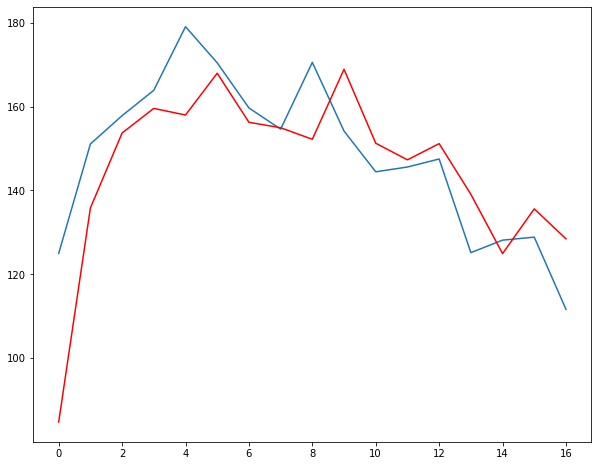

GC1_ADX
predicted=68.279971, expected=67.848162
predicted=68.122547, expected=60.124352
predicted=56.075670, expected=56.792970
predicted=56.112678, expected=54.126736
predicted=58.102704, expected=53.152774
predicted=53.612264, expected=57.292793
predicted=58.704320, expected=61.213851
predicted=61.987358, expected=62.546362
predicted=60.445757, expected=61.829203
predicted=60.110701, expected=54.122804
predicted=52.122484, expected=48.568031
predicted=48.199360, expected=45.046464
predicted=48.064716, expected=36.749146
predicted=36.299931, expected=31.952276
predicted=31.399623, expected=27.309672
predicted=28.732205, expected=28.869640
predicted=30.409249, expected=29.221557


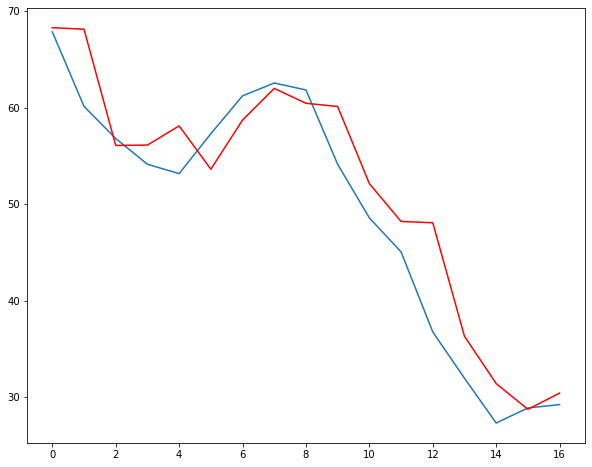

GC1_EWA
predicted=1538.908589, expected=1548.501528
predicted=1556.618465, expected=1593.734352
predicted=1628.103932, expected=1641.456234
predicted=1675.298833, expected=1691.970823
predicted=1725.228339, expected=1782.247215
predicted=1855.606629, expected=1844.031477
predicted=1896.336395, expected=1858.520985
predicted=1864.696006, expected=1864.813990
predicted=1873.758001, expected=1835.109326
predicted=1811.552280, expected=1854.439551
predicted=1872.063082, expected=1852.059701
predicted=1858.767278, expected=1810.739800
predicted=1779.940998, expected=1778.426534
predicted=1755.544948, expected=1774.717689
predicted=1774.647992, expected=1817.311793
predicted=1848.543394, expected=1801.807862
predicted=1786.161577, expected=1805.405241


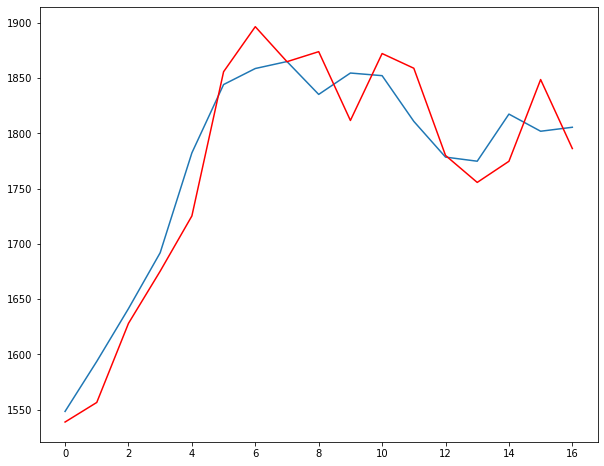

GC1_RSI
predicted=71.102602, expected=73.724359
predicted=70.769563, expected=83.940956
predicted=83.766112, expected=87.194816
predicted=86.702850, expected=89.914107
predicted=87.064485, expected=94.407422
predicted=92.143674, expected=94.494097
predicted=93.361007, expected=71.408796
predicted=70.533789, expected=68.761074
predicted=70.329934, expected=46.881743
predicted=51.698857, expected=63.596279
predicted=68.143512, expected=55.135857
predicted=60.403610, expected=38.481360
predicted=38.832140, expected=36.813813
predicted=36.070205, expected=47.461046
predicted=51.605931, expected=65.712113
predicted=66.607240, expected=46.179032
predicted=42.670695, expected=51.856603


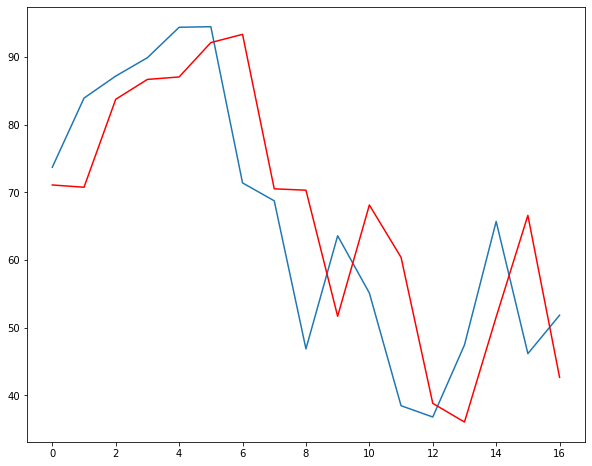

In [34]:
gc1_prediction = pd.DataFrame()
ind = ["_ATR","_ADX","_EWA","_RSI"]
for i in range(4):
    print(gc1.columns[i])
    train, test = np_gc1[:size,i],np_gc1[size:,i]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order = (5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
       
    gc1_prediction["c_1"+ind[i]] = predictions 
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    
gc1_prediction["yhat"]= regr.predict(gc1_prediction)
gc1_avg = gc1_prediction[["yhat"]].mean()[0]

HG1_ATR
predicted=22.074101, expected=30.430000
predicted=29.880946, expected=33.260000
predicted=34.063619, expected=31.830000
predicted=29.827350, expected=30.260000
predicted=30.901788, expected=33.000000
predicted=27.415060, expected=25.590000
predicted=24.186204, expected=24.360000
predicted=24.608075, expected=28.410000
predicted=28.846300, expected=31.590000
predicted=29.756243, expected=30.440000
predicted=35.287266, expected=29.390000
predicted=30.060440, expected=42.710000
predicted=40.648648, expected=42.700000
predicted=40.536699, expected=45.760000
predicted=46.649676, expected=50.480000
predicted=53.132468, expected=58.410000
predicted=52.531452, expected=50.030000


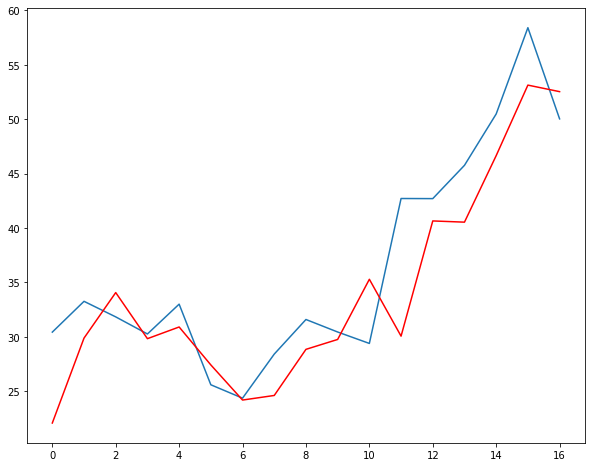

HG1_ADX
predicted=21.992854, expected=23.638601
predicted=24.457663, expected=32.365233
predicted=40.656357, expected=38.736042
predicted=41.828784, expected=39.476366
predicted=38.235402, expected=33.622507
predicted=28.945616, expected=34.005149
predicted=33.171113, expected=35.451795
predicted=35.450208, expected=37.263881
predicted=36.666157, expected=38.048098
predicted=39.976160, expected=42.317373
predicted=44.640712, expected=47.180326
predicted=48.840835, expected=52.303153
predicted=52.723478, expected=58.652484
predicted=60.855733, expected=63.916644
predicted=63.774256, expected=68.993120
predicted=68.714350, expected=71.536772
predicted=69.900863, expected=65.479711


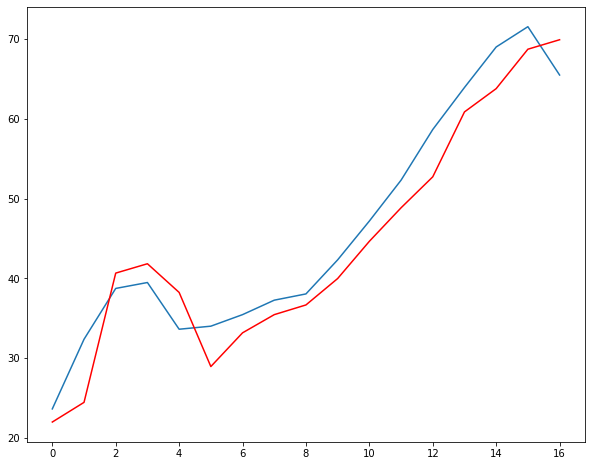

HG1_EWA
predicted=255.023743, expected=248.224224
predicted=243.892062, expected=243.949483
predicted=238.498016, expected=243.516322
predicted=245.783269, expected=252.794215
predicted=257.635530, expected=263.829476
predicted=271.185401, expected=277.252984
predicted=284.144881, expected=285.785323
predicted=291.411075, expected=291.973549
predicted=294.702400, expected=308.665699
predicted=320.873887, expected=322.910466
predicted=337.937923, expected=334.390311
predicted=340.829051, expected=359.410207
predicted=376.381042, expected=373.040138
predicted=390.260067, expected=397.993425
predicted=412.463595, expected=421.412284
predicted=444.341170, expected=424.158189
predicted=433.942112, expected=432.122126


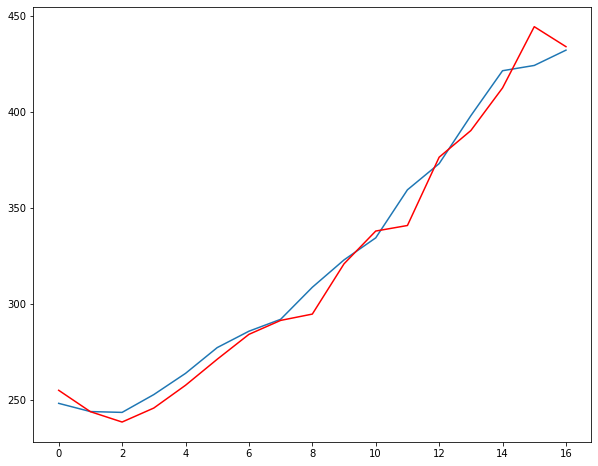

HG1_RSI
predicted=27.929616, expected=22.636884
predicted=33.699271, expected=35.337486
predicted=32.259495, expected=42.802195
predicted=46.661188, expected=63.596894
predicted=59.068296, expected=70.413370
predicted=69.006614, expected=77.113930
predicted=70.242134, expected=75.643196
predicted=73.125355, expected=76.320623
predicted=73.875486, expected=87.362783
predicted=86.454416, expected=88.958938
predicted=92.079109, expected=89.966962
predicted=86.634098, expected=94.981698
predicted=93.215504, expected=85.590236
predicted=88.510871, expected=91.229429
predicted=86.515545, expected=92.746412
predicted=96.388445, expected=65.773118
predicted=70.189904, expected=70.828323


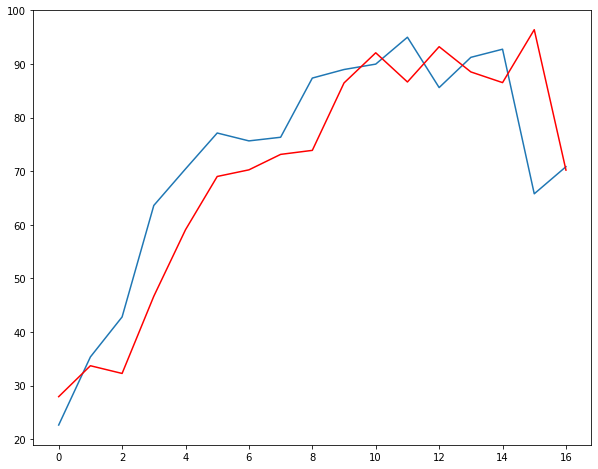

In [35]:
hg1_prediction = pd.DataFrame()
ind = ["_ATR","_ADX","_EWA","_RSI"]
for i in range(4):
    print(hg1.columns[i])
    train, test = np_hg1[:size,i],np_hg1[size:,i]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order = (5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
       
    hg1_prediction["c_1"+ind[i]] = predictions 
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    
hg1_prediction["yhat"]= regr.predict(hg1_prediction)
hg1_avg = hg1_prediction[["yhat"]].mean()[0]

SI1_ATR
predicted=1.638793, expected=2.632000
predicted=2.841910, expected=2.790000
predicted=2.772757, expected=3.145000
predicted=3.378113, expected=3.238000
predicted=3.399756, expected=4.363000
predicted=4.393240, expected=4.448000
predicted=4.744346, expected=5.438000
predicted=5.593923, expected=5.304000


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=6.029496, expected=5.743000
predicted=5.379845, expected=5.097200
predicted=5.404914, expected=4.554200
predicted=3.665463, expected=3.966200
predicted=3.847045, expected=4.059200
predicted=3.688396, expected=3.725200
predicted=3.823312, expected=3.327400
predicted=3.100059, expected=3.233400
predicted=3.369919, expected=2.810400


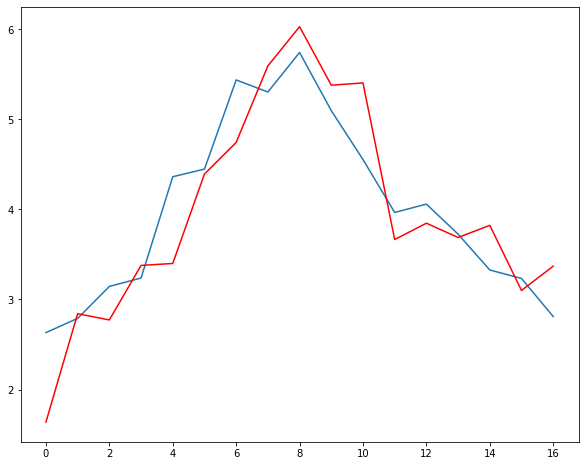

SI1_ADX
predicted=46.895083, expected=42.008301
predicted=41.444303, expected=44.989042
predicted=45.363730, expected=45.653793
predicted=47.166942, expected=38.832087
predicted=37.925668, expected=33.817034
predicted=30.546340, expected=39.600425
predicted=43.215972, expected=44.982954
predicted=48.575066, expected=45.273773
predicted=43.964284, expected=45.026436
predicted=42.339956, expected=43.310756
predicted=42.250299, expected=43.700972
predicted=44.593092, expected=45.191780
predicted=45.957209, expected=47.170241
predicted=47.851753, expected=42.901059
predicted=40.797818, expected=40.297890
predicted=39.499054, expected=41.197205
predicted=42.310647, expected=39.907438


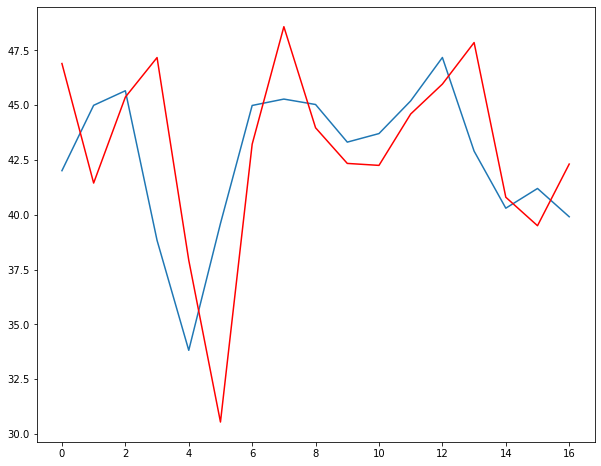

SI1_EWA
predicted=16.989163, expected=16.125386
predicted=15.414449, expected=15.716258
predicted=15.430847, expected=16.624172
predicted=17.342613, expected=17.263114
predicted=17.641466, expected=19.571743
predicted=20.963311, expected=22.526829
predicted=24.666232, expected=22.828886
predicted=22.697600, expected=23.091591
predicted=22.695193, expected=22.905727
predicted=21.589105, expected=24.047818
predicted=25.478039, expected=24.998545
predicted=25.565435, expected=25.466364
predicted=25.768209, expected=25.149909
predicted=24.722892, expected=25.384273
predicted=25.598922, expected=26.253848
predicted=26.905754, expected=26.224232
predicted=26.196881, expected=25.992155


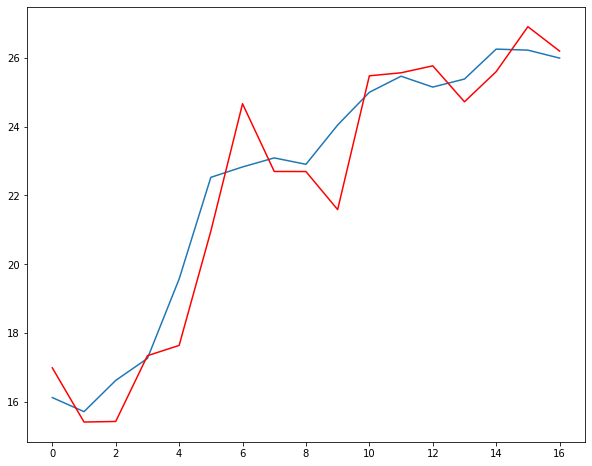

SI1_RSI
predicted=48.421293, expected=26.860512
predicted=32.360054, expected=37.125253
predicted=42.144657, expected=64.611905
predicted=66.135330, expected=65.154868
predicted=60.476895, expected=83.186896
predicted=73.153833, expected=88.689635
predicted=77.610151, expected=59.847839
predicted=55.359871, expected=60.439163
predicted=60.970924, expected=54.530655
predicted=57.277724, expected=68.170859
predicted=74.124889, expected=69.861042
predicted=71.123658, expected=66.018944
predicted=64.815923, expected=52.387220
predicted=52.199976, expected=59.750163
predicted=60.445683, expected=69.266290
predicted=69.954885, expected=55.304811
predicted=57.617870, expected=50.841084


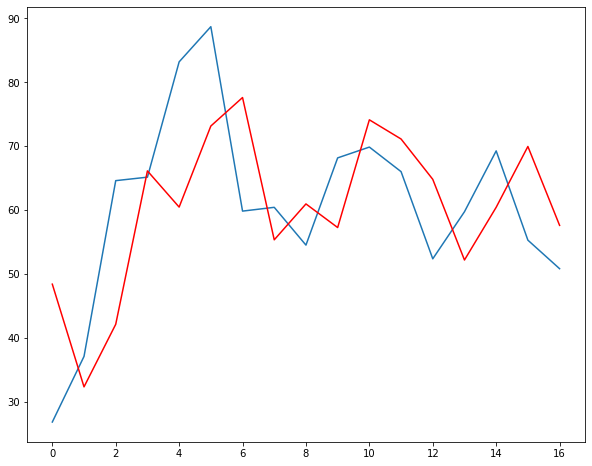

In [36]:
si1_prediction = pd.DataFrame()
ind = ["_ATR","_ADX","_EWA","_RSI"]
for i in range(4):
    print(si1.columns[i])
    train, test = np_si1[:size,i],np_si1[size:,i]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order = (5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
       
    si1_prediction["c_1"+ind[i]] = predictions 
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    
si1_prediction["yhat"]= regr.predict(si1_prediction)
si1_avg = si1_prediction[["yhat"]].mean()[0]

In [37]:
mean = [cl1_avg,c_1_avg,gc1_avg,hg1_avg,si1_avg]

In [38]:
pct_change_cl1 = (cl1_avg - data['CL1 Comdty'].mean()) / data['CL1 Comdty'].mean()
pct_change_c_1 = (c_1_avg - data['C 1 Comdty'].mean()) / data['C 1 Comdty'].mean()
pct_change_gc1 = (gc1_avg - data['GC1 Comdty'].mean()) / data['GC1 Comdty'].mean()
pct_change_hg1 = (hg1_avg - data['HG1 Comdty'].mean()) / data['HG1 Comdty'].mean()
pct_change_si1 = (si1_avg - data['SI1 Comdty'].mean()) / data['SI1 Comdty'].mean()

<Figure size 720x576 with 0 Axes>

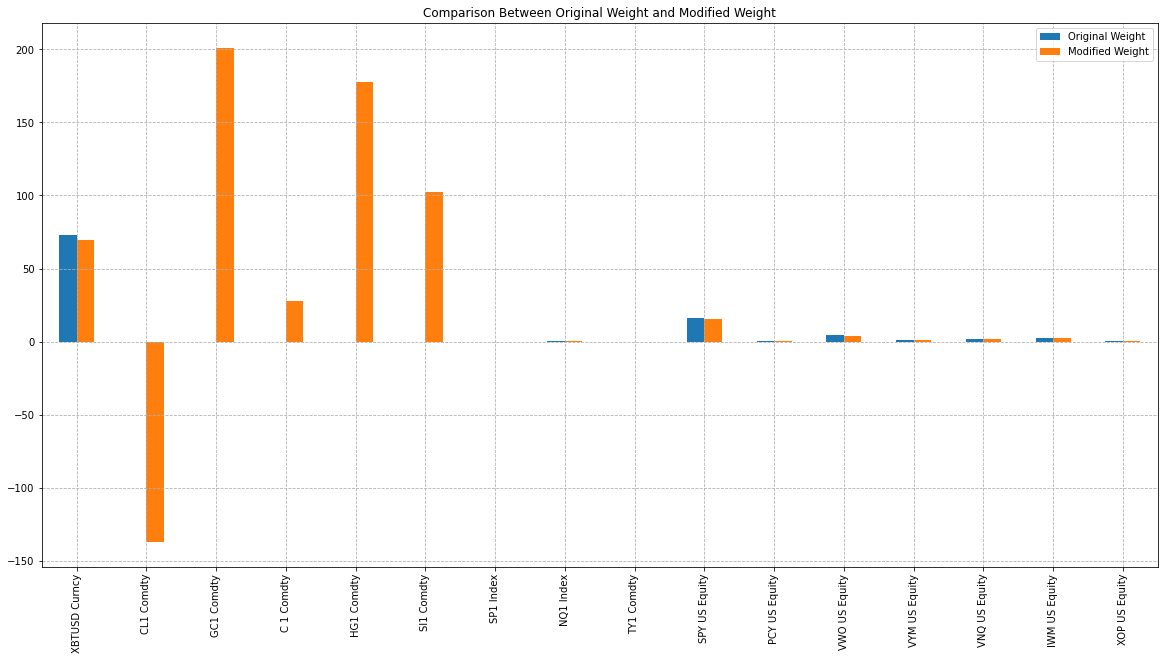

In [39]:
#W_mkt = np.array(weight).T
Q = np.array([[pct_change_cl1],[pct_change_c_1],[pct_change_gc1],[pct_change_hg1],[pct_change_si1]]) # CL1, C 1, GC1, HG1, SI1
P = np.array([[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]\
            ,[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]])

omega = np.zeros((5,5))
omega[0,0] = P[0,:] @ cov_excess_return @ P[0,:].T
omega[1,1] = P[1,:] @ cov_excess_return @ P[1,:].T
omega[2,2] = P[2,:] @ cov_excess_return @ P[2,:].T
omega[3,3] = P[3,:] @ cov_excess_return @ P[3,:].T
omega[4,4] = P[4,:] @ cov_excess_return @ P[4,:].T

expected_return, BL_return, updated_sigmaR, updated_weight = BL.BlackLitterman(W_mkt,risk_aversion\
                                                                    ,tau, cov_excess_return, P, Q, omega)

updated_sigmaR = pd.DataFrame(data = updated_sigmaR)
updated_weight = updated_weight

Weight_comparison_data = pd.DataFrame(data = W_mkt.T,index = data.columns, columns = ["Original Weight"])
Weight_comparison_data['Modified Weight'] = updated_weight
fig = plt.figure()
Weight_comparison_data.plot(figsize = (20,10),kind = 'bar')
ax = plt.gca()
ax.set_title('Comparison Between Original Weight and Modified Weight')
ax.grid(True,linestyle = '--')
#plt.savefig("weight2.png")